# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Deploy LLM App with Ollama and Langchain in Production**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## Chatbot with LangGraph - Baby Step Toward Agents

In [1]:
from dotenv import load_dotenv
import os

load_dotenv('../.env')

True

In [2]:
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END

from langgraph.graph.message import add_messages 

from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")

In [3]:
llm.invoke("Hi")

AIMessage(content='How can I help you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T13:23:13.5693718Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2407507100, 'load_duration': 1972022200, 'prompt_eval_count': 26, 'prompt_eval_duration': 127878000, 'eval_count': 8, 'eval_duration': 300009000}, id='run-21ba7dae-856e-46f7-90de-2ad48af83972-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

In [4]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()


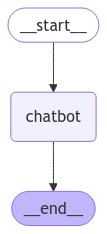

In [5]:
from IPython.display import Image, display


display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"messages": ["Hi", "myself is laxmi kant"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='ee2d9fa4-5b9c-4c22-a70d-b507175becc3'),
  HumanMessage(content='myself is laxmi kant', additional_kwargs={}, response_metadata={}, id='ba7c539b-3b41-4ffb-a007-dd085da8e9a0'),
  AIMessage(content="Namaste Laxmi Kant! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T13:23:15.9922466Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1159074100, 'load_duration': 34432100, 'prompt_eval_count': 34, 'prompt_eval_duration': 50262000, 'eval_count': 30, 'eval_duration': 1071243000}, id='run-ada13ef5-732d-4801-a44d-d33bd4a25d78-0', usage_metadata={'input_tokens': 34, 'output_tokens': 30, 'total_tokens': 64})]}

In [ ]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("Bye!")
        break

    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='05a9e5cf-1ff2-4e21-ac51-4dbdc9276eae'),
  AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T11:23:13.7892884Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 624961900, 'load_duration': 21625800, 'prompt_eval_count': 26, 'prompt_eval_duration': 312347000, 'eval_count': 8, 'eval_duration': 289096000}, id='run-83598e1e-ddb2-4eab-8860-bb50ea854de6-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})]}

### Enhancing the Chatbot with Tools - Making it More Like an Agent

In [25]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_core.tools import tool

llm = ChatOllama(model="llama3.2:3b", base_url="http://localhost:11434")

In [31]:
@tool
def internet_search(query):
    """
    Search the web for realtime and latest information.
    for examples, news, stock market, weather updates etc.
    
    Args:
    query: The search query
    """
    
    search = TavilySearchResults(
        max_results=3,
        search_depth="advanced",
        include_answer=True,
        include_raw_content=True,
    )
    response = search.invoke(query)
    return response

@tool
def llm_search(query):
    """
    Use the LLM model for general and basic information.
    """
    message = HumanMessage(query)
    response = llm.invoke(message)
    return response

tools = [internet_search, llm_search]
tools

[StructuredTool(name='internet_search', description='Search the web for realtime and latest information.\nfor examples, news, stock market, weather updates etc.\n\nArgs:\nquery: The search query', args_schema=<class 'langchain_core.utils.pydantic.internet_search'>, func=<function internet_search at 0x000001C7A0110860>),
 StructuredTool(name='llm_search', description='Use the LLM model for general and basic information.', args_schema=<class 'langchain_core.utils.pydantic.llm_search'>, func=<function llm_search at 0x000001C7A0111620>)]

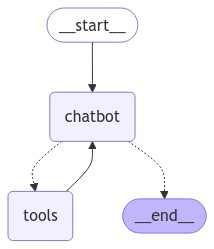

In [32]:
graph_builder = StateGraph(State)

llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))


In [33]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    output = graph.invoke({"messages": [("user", user_input)]})
    print(output)


{'messages': [HumanMessage(content='tell me 3 facts about the earth', additional_kwargs={}, response_metadata={}, id='85ce5bd0-0322-457f-b71d-145096feac5a'), AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T13:53:14.0683393Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'llm_search', 'arguments': {'query': 'facts about the Earth'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 573812600, 'load_duration': 20122100, 'prompt_eval_count': 231, 'prompt_eval_duration': 264143000, 'eval_count': 21, 'eval_duration': 288472000}, id='run-8d783d26-ac9a-474f-833b-9a11abc86028-0', tool_calls=[{'name': 'llm_search', 'args': {'query': 'facts about the Earth'}, 'id': 'ab1813b9-026c-4aae-9314-5b599e9eed64', 'type': 'tool_call'}], usage_metadata={'input_tokens': 231, 'output_tokens': 21, 'total_tokens': 252}), ToolMessage(content='Error: ValueError("Invalid input type <class \'langchain_

### Adding Memory to the Chatbot

- LangGraph solves this problem through persistent checkpointing. If you provide a checkpointer when compiling the graph and a thread_id when calling your graph, LangGraph automatically saves the state after each step

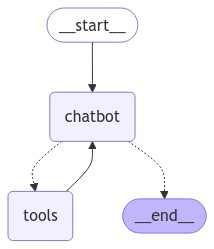

In [18]:
from langgraph.checkpoint.memory import MemorySaver


graph_builder = StateGraph(State)

llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")


memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)


display(Image(graph.get_graph().draw_mermaid_png()))


In [19]:
config = {"configurable": {"thread_id": "1"}}

while True:
    user_input = input()
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    output = graph.invoke({"messages": [("user", user_input)]}, config=config)
    output['messages'][-1].pretty_print()

================================== Ai Message ==================================

I'll try again with the correct format.

Here are 3 simple facts about the Earth:

1. The Earth is the third planet from the Sun in our solar system.
2. The Earth's surface covers approximately 71% of its volume, with the remaining 29% consisting of oceans, lakes, and rivers.
3. The Earth's diameter is approximately 12,742 kilometers (7,918 miles), making it the fifth-largest planet in our solar system.

Is there anything else I can help you with?
================================== Ai Message ==================================

I'll try again with a correct format.

Here are 3 simple facts about the Sun:

1. The Sun is a star and the center of our solar system.
2. The Sun makes up about 99.8% of the mass of our solar system.
3. The Sun's surface temperature is approximately 5,500 degrees Celsius (9,932 degrees Fahrenheit), while its core temperature is around 15,000,000 degrees Celsius (27,000,000 degrees